Prepared By: Partha Pratim Ray

**Kaggle Dataset Loading on Google Colab**

Using  https://www.kaggle.com/datasets/obulisainaren/multi-cancer

**Upload Kaggle Token to Colab:**

In [6]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"partharay","key":"c54460aaf00a7d8c320e97f2f399c011"}'}

**Set Up Kaggle API**

Move the uploaded kaggle.json to the appropriate directory and set permissions

In [7]:
!mkdir -p /content/kaggle
!mv kaggle.json /content/kaggle
!chmod 600 /content/kaggle/kaggle.json


**Install Kaggle Package**

Install the Kaggle library to use its API

In [8]:
!pip install kaggle


**Downloading Dataset to Colab**

Locate Dataset Information:

*   Visit the dataset page (e.g., Multi Cancer Dataset) https://www.kaggle.com/datasets/obulisainaren/multi-cancer.
*   Get the dataset identifier (obulisainaren/multi-cancer).


Download Dataset

*   Use the Kaggle API to download the dataset

In [9]:
!kaggle datasets download -d obulisainaren/multi-cancer


Dataset URL: https://www.kaggle.com/datasets/obulisainaren/multi-cancer
License(s): CC-BY-NC-SA-4.0
100% 8.61G/8.62G [01:49<00:00, 133MB/s]
100% 8.62G/8.62G [01:50<00:00, 84.0MB/s]


Extract Dataset

*   Unzip the dataset to a working directory in Colab

In [10]:
!unzip multi-cancer.zip -d /content/multi_cancer


Streaming output truncated to the last 5000 lines.
  inflating: /content/multi_cancer/Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0003.jpg  
  inflating: /content/multi_cancer/Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0004.jpg  
  inflating: /content/multi_cancer/Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0005.jpg  
  inflating: /content/multi_cancer/Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0006.jpg  
  inflating: /content/multi_cancer/Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0007.jpg  
  inflating: /content/multi_cancer/Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0008.jpg  
  inflating: /content/multi_cancer/Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0009.jpg  
  inflating: /content/multi_cancer/Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0010.jpg  
  inflating: /content/multi_cancer/Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0011.jpg  
  inflating: /content/multi_can

**Basic Data Exploration Using PyTorch**

Install PyTorch

*   Ensure PyTorch is installed

In [11]:
!pip install torch torchvision


**Import Required Libraries**

*   Set up libraries for exploration







In [12]:
import os
import pandas as pd
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image

**Explore Dataset Files**

*   Check the structure of the dataset



In [13]:
dataset_path = "/content/multi_cancer"
print(os.listdir(dataset_path))

['Multi Cancer', 'README.md']


**Load Images**

Define transforms and create a dataset loader

In [14]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


**Visualize Data**

Display some images from the dataset

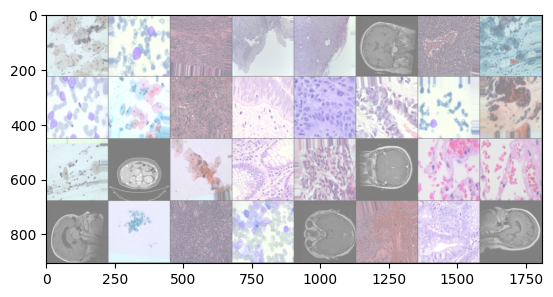

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(dataloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(labels)


**Basic dataset statistics: Calculate mean and standard deviation of the dataset for normalization:
python**

**Transformation**: The code uses transforms. Compose() to define a series of transformations for the dataset. You may adjust the transformations to match your dataset's requirements (e.g., resizing images).

**DataLoader**: The DataLoader is created with the dataset, using a batch_size of 32 (you can adjust this).

**Batch Processing**: The mean and standard deviation are calculated iteratively, without loading the entire dataset into memory at once.

**Device Handling**: The code includes a check to use the GPU if available (via torch.cuda.is_available()), which is useful for larger datasets.

Calculate mean and standard deviation of the dataset for normalization

In [9]:


import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define transformations for the images (e.g., resize and convert to tensor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Assuming you have already loaded the dataset, such as from Kaggle or other sources
dataset = datasets.ImageFolder(root='/content/multi_cancer/Multi Cancer/Multi Cancer/Brain Cancer/', transform=transform)

# Create a DataLoader to load the data in batches
dataloader = DataLoader(dataset, shuffle=True)

# Initialize variables for running sums
mean = 0.
std = 0.
total_images = 0

# Iterate over the dataset in batches
for images, _ in dataloader:
    # Move to GPU if available, or stay on CPU
    images = images.cuda() if torch.cuda.is_available() else images

    # Calculate the mean and std for the batch
    batch_samples = images.size(0)  # Number of images in the batch
    images = images.view(batch_samples, images.size(1), -1)  # Flatten the images

    mean += images.mean(2).sum(0)  # Sum of means of each channel
    std += images.std(2).sum(0)  # Sum of stds of each channel
    total_images += batch_samples

# Divide by the total number of images to get the final mean and std
mean /= total_images
std /= total_images

print(f"Mean: {mean}, Std: {std}")


Mean: tensor([0.1539, 0.1539, 0.1539], device='cuda:0'), Std: tensor([0.1642, 0.1642, 0.1642], device='cuda:0')


**Additional Topics (If Time Permits)**

Train/Test Split

In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


Custom Dataset Classes for specific formats.

Model Integration for basic classification tasks.
